In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving exchange_rate.csv to exchange_rate.csv


In [3]:
df = pd.read_csv("exchange_rate.csv",parse_dates=['date'], dayfirst=True)

In [4]:
df.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


In [5]:
df.shape

(7588, 2)

In [6]:
df.isna().sum()

,0
date,0
Ex_rate,0


In [7]:
df.describe()

,date,Ex_rate
count,7588,7588.000000
mean,2000-05-21 12:00:00,0.776974
min,1990-01-01 00:00:00,0.483297
25%,1995-03-12 18:00:00,0.701422
50%,2000-05-21 12:00:00,0.761377
75%,2005-07-31 06:00:00,0.873477
max,2010-10-10 00:00:00,1.102536
std,NaN,0.136620


In [8]:
df['Ex_rate'].describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


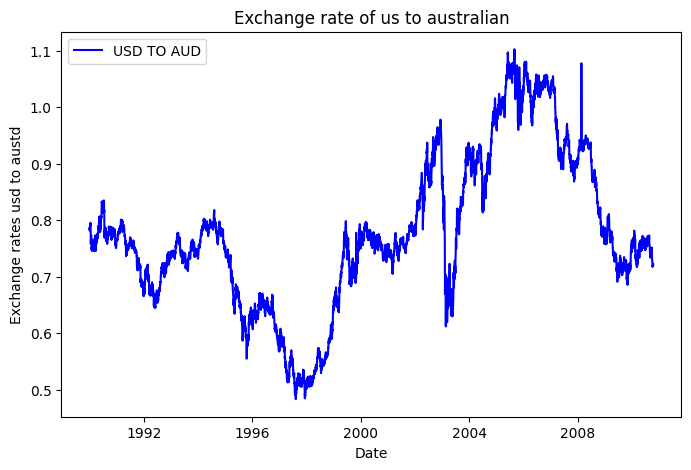

In [9]:
#line plot
plt.figure(figsize=(8,5))
plt.plot(df['date'],df['Ex_rate'],color='blue',label='USD TO AUD')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Exchange rates usd to austd')
plt.title('Exchange rate of us to australian')
plt.show()

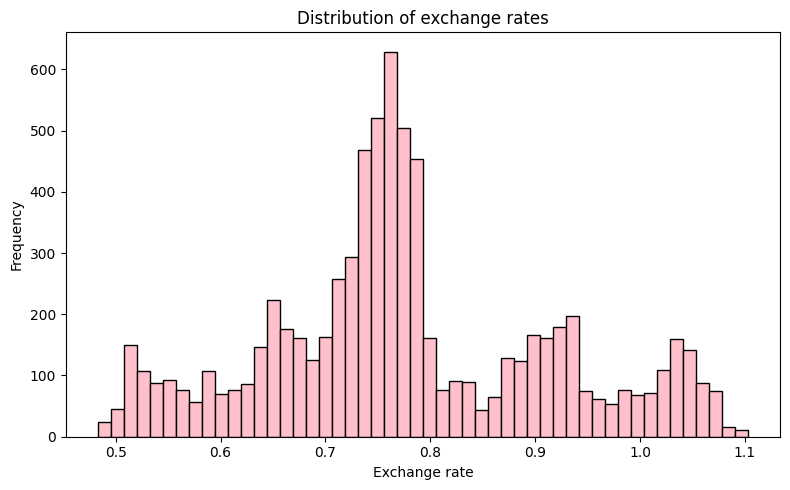

In [10]:
#histogram
plt.figure(figsize=(8,5))
plt.hist(df['Ex_rate'],bins=50,color='pink',edgecolor='black')
plt.xlabel('Exchange rate')
plt.ylabel('Frequency')
plt.title('Distribution of exchange rates')
plt.tight_layout()
plt.show()

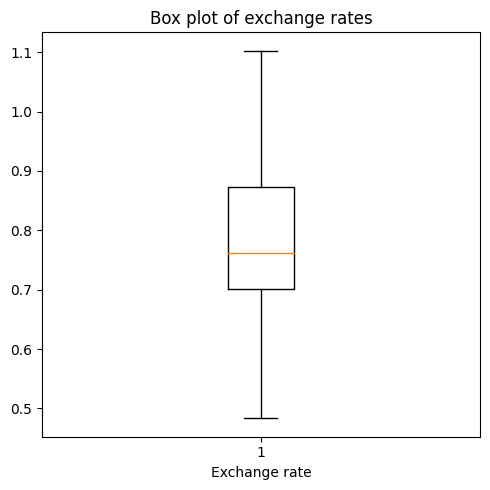

In [11]:
#box plot
plt.figure(figsize=(5,5))
plt.boxplot(df['Ex_rate'])
plt.xlabel('Exchange rate')
plt.title('Box plot of exchange rates')
plt.tight_layout()
plt.show()

<Axes: >

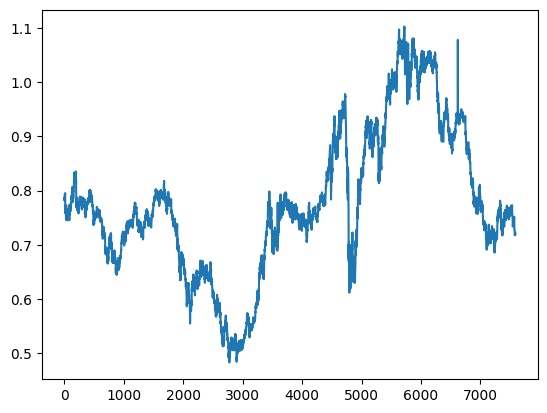

In [12]:
df=pd.read_csv('exchange_rate.csv')
df.Ex_rate.plot()

### Moving avg plot

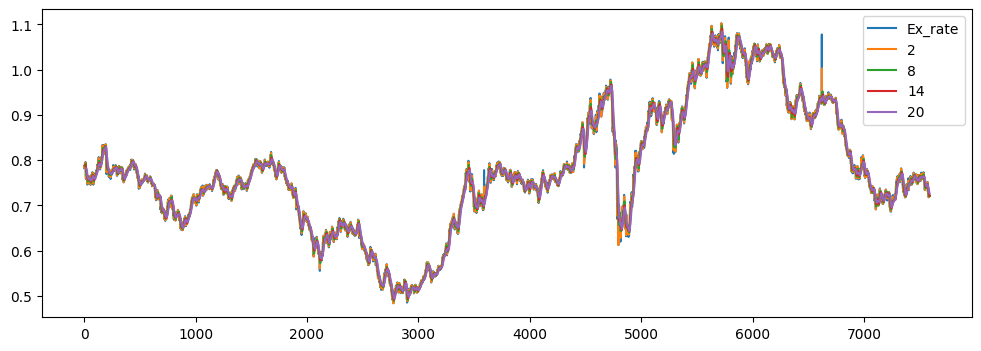

In [13]:
plt.figure(figsize=(12,4))
df.Ex_rate.plot().plot(label="org")
for i in range(2,24,6):
    df['Ex_rate'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time Series Decomposition

In [14]:

import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

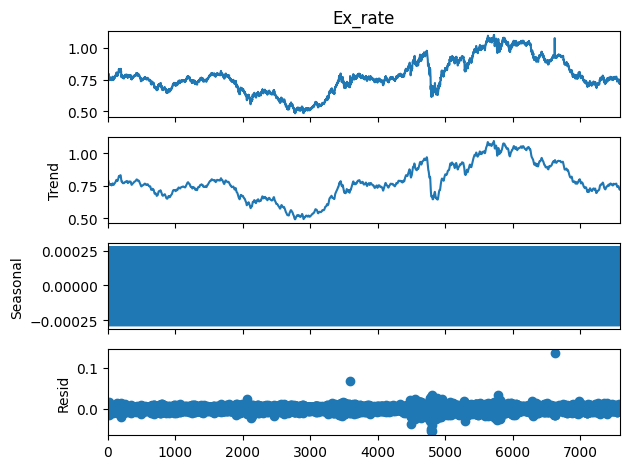

In [15]:
decompose_ts_add = seasonal_decompose(df.Ex_rate,period=12)
decompose_ts_add.plot()
plt.show()

### ACF and PACF plots

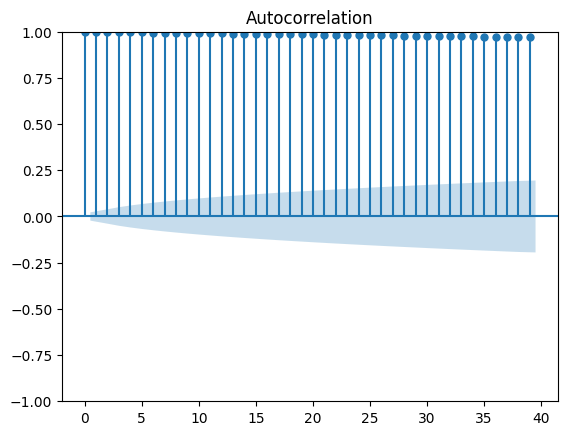

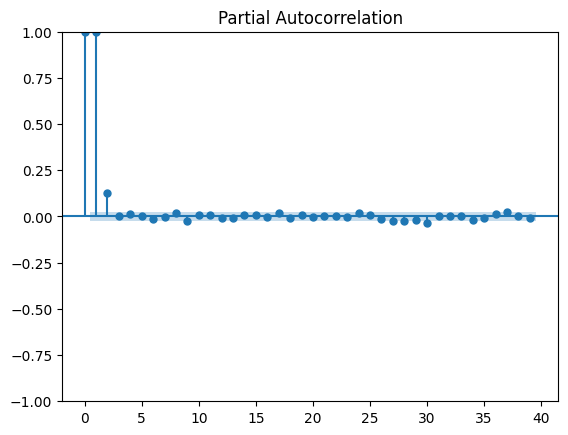

In [16]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Ex_rate)
tsa_plots.plot_pacf(df.Ex_rate)
plt.show()


### converting non-stationary to stationary

In [17]:
df['Ex_rate_diff'] = df['Ex_rate'].diff()
df['Ex_rate_diff']

,Ex_rate_diff
0,NaN
1,-0.003700
2,0.004900
3,-0.000700
4,-0.001100
...,...
7583,-0.000207
7584,0.003345
7585,0.001358
7586,-0.002372


In [18]:
df.isna().sum()

,0
date,0
Ex_rate,0
Ex_rate_diff,1


In [19]:
df = df.dropna()

In [20]:
df.head()

,date,Ex_rate,Ex_rate_diff
1,02-01-1990 00:00,0.7818,-0.0037
2,03-01-1990 00:00,0.7867,0.0049
3,04-01-1990 00:00,0.7860,-0.0007
4,05-01-1990 00:00,0.7849,-0.0011
5,06-01-1990 00:00,0.7866,0.0017


In [21]:
df.isna().sum()

,0
date,0
Ex_rate,0
Ex_rate_diff,0


### Checking if the data is stationary or not by plots

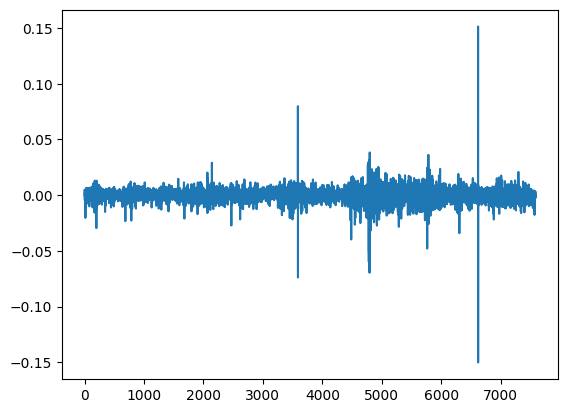

In [22]:
plt.plot(df['Ex_rate_diff'])
plt.show()

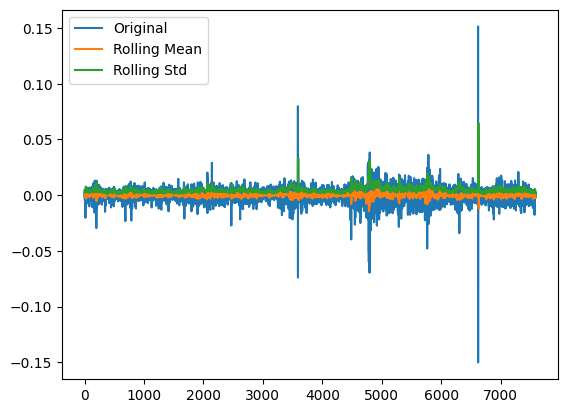

In [23]:
rolling_mean = df['Ex_rate_diff'].rolling(window=12).mean()
rolling_std = df['Ex_rate_diff'].rolling(window=12).std()
plt.plot(df['Ex_rate_diff'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Ex_rate_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -99.39343120118632
p-value: 0.0


###Plotting the graph with pandas auto correlation plot to show the difference between the stationary data and non - stationary data  

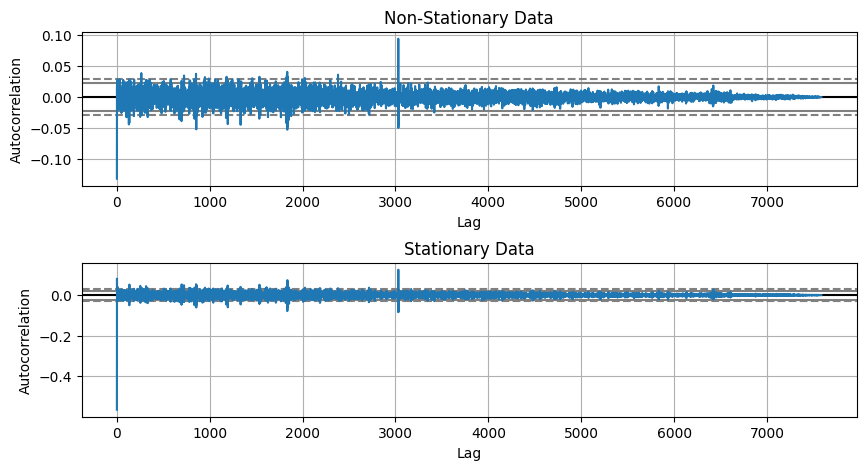

In [26]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df['Ex_rate_diff'], ax = ax1)
ax1.set_title('Non-Stationary Data')
df1 = df['Ex_rate_diff'].diff().dropna()
ax2 = autocorrelation_plot(df1 , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Stationary data and Non-Stationary data.png')
plt.show()

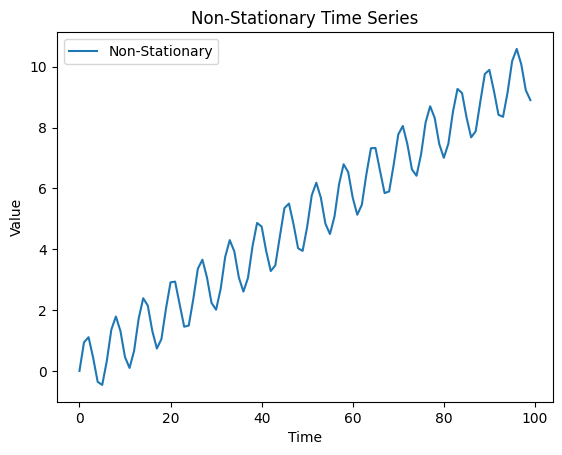

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a time series with a trend
time = np.arange(0, 100)
trend = 0.1 * time
non_stationary_data = np.sin(time) + trend

# Plot the non-stationary data
plt.plot(time, non_stationary_data, label='Non-Stationary')
plt.title('Non-Stationary Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

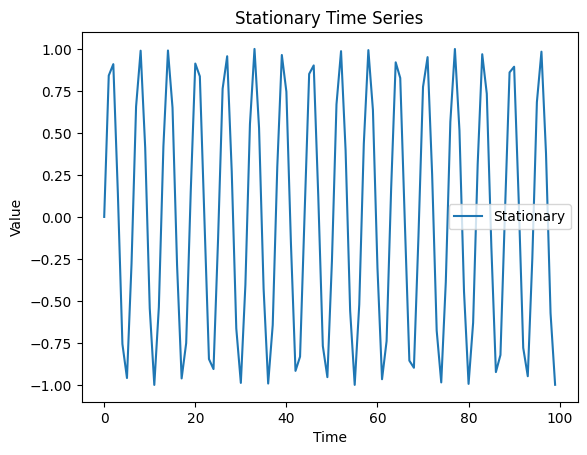

In [28]:
# Generate a stationary time series
stationary_data = np.sin(time)

# Plot the stationary data
plt.plot(time, stationary_data, label='Stationary')
plt.title('Stationary Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [29]:
!pip install pmdarima
from pmdarima.arima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.1 MB/s eta 0:00:00


In [40]:
model = auto_arima(df['Ex_rate_diff'] , m = 52, d = 1 ,seasonal = False , max_order = 8 , test = 'adf' , trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-55500.038, Time=4.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-49769.255, Time=1.77 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-52689.674, Time=2.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-55273.594, Time=2.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-49771.255, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-55587.733, Time=5.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-55463.846, Time=10.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-54964.563, Time=3.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-55646.944, Time=9.66 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-55789.659, Time=4.79 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-55881.400, Time=7.94 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-55797.995, Time=9.73 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=22.22 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=-55882.283, Time=23.35 sec
 ARIMA(2,

### Defining the summary of the model fitted with auto_arima function , here getting various information such as Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC) , Hannan-Quinn Information Criterion (HQIC), Log Likelihood etc. From which we can evaluate the model

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7587
Model:               SARIMAX(1, 1, 5)   Log Likelihood               27949.142
Date:                Wed, 09 Oct 2024   AIC                         -55882.283
Time:                        08:48:00   BIC                         -55826.811
Sample:                             0   HQIC                        -55863.245
                               - 7587                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -5.02e-06   6.07e-06     -0.828      0.408   -1.69e-05    6.87e-06
ar.L1         -0.6959      0.002   -287.555      0.000      -0.701      -0.691
ma.L1         -0.3808      0.003   -143.087      0.000      -0.386      -0.376
ma.L2         -0.6249      0.004   -153.347      0.000      -0.633      -0.617
ma.L3          0.0686      0.007     10.068      0.000       0.055       0.082
ma.L4          0.0052      0.009      0.613      0.540      -0.011       0.022
ma.L5          0.0130      0.008      1.569      0.117      -0.003       0.029
sigma2      3.686e-05    1.1e-07    335.248      0.000    3.66e-05    3.71e-05
===================================================================================
Ljung-Box (L1) (Q):                   6.32   Jarque-Bera (JB):           3024850.94
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               3.00   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                       100.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.1e+16. Standard errors may be unstable.
"""

In [43]:
model = ARIMA(Ex_rate, order = (1,1,5))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 5)   Log Likelihood               28054.779
Date:                Wed, 09 Oct 2024   AIC                         -56095.558
Time:                        08:49:28   BIC                         -56047.019
Sample:                             0   HQIC                        -56078.900
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6133      0.426     -1.441      0.150      -1.447       0.221
ma.L1          0.4816      0.426      1.131      0.258      -0.353       1.316
ma.L2         -0.0651      0.057     -1.142      0.254      -0.177       0.047
ma.L3         -0.0097      0.008     -1.142      0.254      -0.026       0.007
ma.L4         -0.0067      0.011     -0.586      0.558      -0.029       0.016
ma.L5          0.0141      0.008      1.670      0.095      -0.002       0.031
sigma2      3.592e-05   1.01e-07    354.557      0.000    3.57e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2859489.58
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

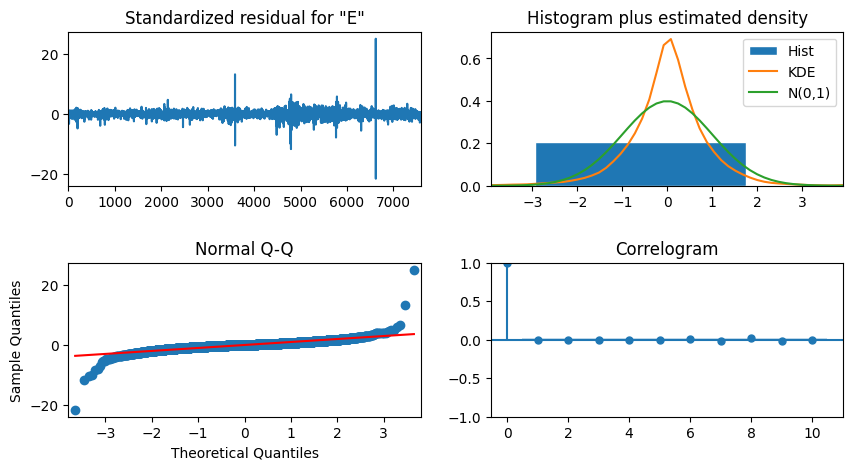

In [44]:
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Diagnostic plot of best model.png')
plt.show()

In [46]:
predictions = result.predict(typ = 'levels')
predictions

,predicted_mean
0,0.000000
1,0.785500
2,0.782288
3,0.786053
4,0.786147
...,...
7583,0.718797
7584,0.718541
7585,0.721402
7586,0.723031


### model evaluation

In [ ]:
#Evaluating the model with the following metrics such as percentage of r2 score , mean squared error ,
# root mean squared error , mean absolute error and mean absolute percentage error for the predicted value and
 # whole data value.

In [51]:
#!pip install scikit-learn # Install the library first, if needed
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
df_week = pd.read_csv('exchange_rate.csv')


In [50]:
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_week['Ex_rate'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_week['Ex_rate'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_week['Ex_rate'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_week['Ex_rate'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_week['Ex_rate'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 99.37 % 

Mean Squared Error :  0.00011725977372101033 

Mean Absolute Error :  0.0037976237826361707 

Root Mean Squared Error :  0.010828655212952822 

Mean Absolute Percentage Error : 0.50 %


In [ ]:
#Concating the Resampled weekly dataset and weekly first difference dataframe and the prediction value and
#naming the columns as Foreign Exchange Rate (weekly)','Weekly First Difference','Predicted Exchange Rate and
#exporting the dataframe to [Comma Seperated Value (CSV)] file.
#Also displaying the first five records of the exported dataframe.

In [62]:
# Importing the pandas library for data manipulation
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# Loading the exchange rate data
df_week = pd.read_csv('exchange_rate.csv')

# Assuming df1_week is meant to hold the weekly first difference, calculate it
# Replace 'Ex_rate' with the actual column name if different
df1_week = df_week['Ex_rate'].diff().fillna(0)  # Filling NaN with 0 for the first row

# ... rest of your code for model predictions ...

# Concating the dataframes
Final_data = pd.concat([df_week, df1_week, predictions], axis=1)
# Updated line to provide three column names matching the number of columns in Final_data
Final_data.columns = ['Date','Foreign Exchange Rate (weekly)', 'Weekly First Difference', 'Predicted Exchange Rate']
Final_data.to_csv('Foreign Exchange Rate with Prediction (USD to AUD).csv')
Final_data.head()

,Date,Foreign Exchange Rate (weekly),Weekly First Difference,Predicted Exchange Rate
0,01-01-1990 00:00,0.7855,0.0000,0.000000
1,02-01-1990 00:00,0.7818,-0.0037,0.785500
2,03-01-1990 00:00,0.7867,0.0049,0.782288
3,04-01-1990 00:00,0.7860,-0.0007,0.786053
4,05-01-1990 00:00,0.7849,-0.0011,0.786147


### Model Testing
Splliting the Resampled Weekly Dataset into training data and test data. Displaying the number of observations in both training data and test data.

In [65]:
size = int(len(df_week)*0.80)
train , test = df_week[0:size]['Ex_rate'] , df_week[size:(len(df_week))]['Ex_rate']
print('Counts of Train Data : ',train.shape[0])
print('Counts of Train Data : ',test.shape[0])

Counts of Train Data :  6070
Counts of Train Data :  1518


## expln
Creating the list of train dataset values in train_values and empty predictions list which will be appended after the prediction. Then fitting the model with ARIMA model with the best value got from auto_arima model in the train_values data and predicting with test data value and appending it to the predictions list and printing the comparison between predicted value and actual value

In [67]:
size = int(len(df_week)*0.80)
train , test = df_week[0:size]['Ex_rate'] , df_week[size:(len(df_week))]['Ex_rate']
print('Counts of Train Data : ',train.shape[0])
print('Counts of Train Data : ',test.shape[0])

# Reset the index of the 'test' Series to start from 0
test = test.reset_index(drop=True)

train_values = [x for x in train]
prediction = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(test)):
    model = ARIMA(train_values , order = (0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_out = output[0]
    prediction.append(float(pred_out))
    # Access 'test' using the reset index 't'
    test_in = test[t]
    train_values.append(test_in)
    print('Predicted = %f , Actual = %f' % (pred_out , test_in))

Counts of Train Data :  6070
Counts of Train Data :  1518
Printing Predictied vs Expected Values....


Predicted = 1.023540 , Actual = 1.025347
Predicted = 1.025243 , Actual = 1.026905
Predicted = 1.026810 , Actual = 1.037344
Predicted = 1.036740 , Actual = 1.038875
Predicted = 1.038753 , Actual = 1.032855
Predicted = 1.033193 , Actual = 1.033293
Predicted = 1.033287 , Actual = 1.031800
Predicted = 1.031885 , Actual = 1.025546
Predicted = 1.025909 , Actual = 1.034650
Predicted = 1.034148 , Actual = 1.035411
Predicted = 1.035338 , Actual = 1.035025
Predicted = 1.035043 , Actual = 1.033293
Predicted = 1.033394 , Actual = 1.036549
Predicted = 1.036368 , Actual = 1.037517
Predicted = 1.037451 , Actual = 1.039933
Predicted = 1.039790 , Actual = 1.036807
Predicted = 1.036978 , Actual = 1.033592
Predicted = 1.033786 , Actual = 1.036592
Predicted = 1.036431 , Actual = 1.043841
Predicted = 1.043416 , Actual = 1.040745
Predicted = 1.040898 , Actual = 1.042731
Predicted = 1.042626 , Actual = 1.03

### expln
Evaluating the model with the following metrics such as percentage of r2 score , mean squared error , root mean squared error , mean absolute error and mean absolute percentage error for the predicted value and test data.

In [68]:
#print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(test,prediction)),'\n')
print('Mean Squared Error : ',mean_squared_error(test,prediction),'\n')
print('Mean Absolute Error : ',mean_absolute_error(test,prediction),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(test,prediction)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,prediction)))

R2 Score for Test data : 99.59 % 

Mean Squared Error :  4.960819187480288e-05 

Mean Absolute Error :  0.003327253882545641 

Root Mean Squared Error :  0.007043308304682032 

Mean Absolute Percentage Error : 0.40 %


In [ ]:
#Making the predicted value as series and index as same as Test Data index since the prediction is based on test data

In [69]:
predictions_df = pd.Series(prediction, index = test.index)

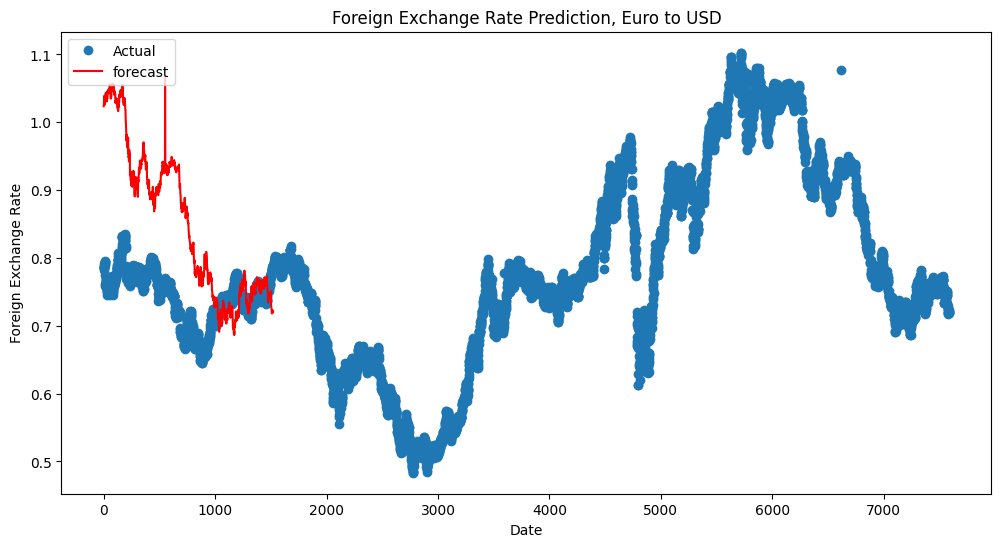

In [75]:
# Convert df_week's values to a 1D array or list
# if it's a dataframe:
#df_week_values = df_week['Ex_rate'].values # Replace 'relevant_column'

# if it's already a numpy array, convert it to list
# df_week_values = df_week.tolist()


plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction, Euro to USD', xlabel='Date', ylabel='Foreign Exchange Rate')

# plot the values against their index
ax.plot(df_week.index, df_week_values, 'o', label='Actual') # Use df_week.index for x-axis

ax.plot(predictions_df, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')

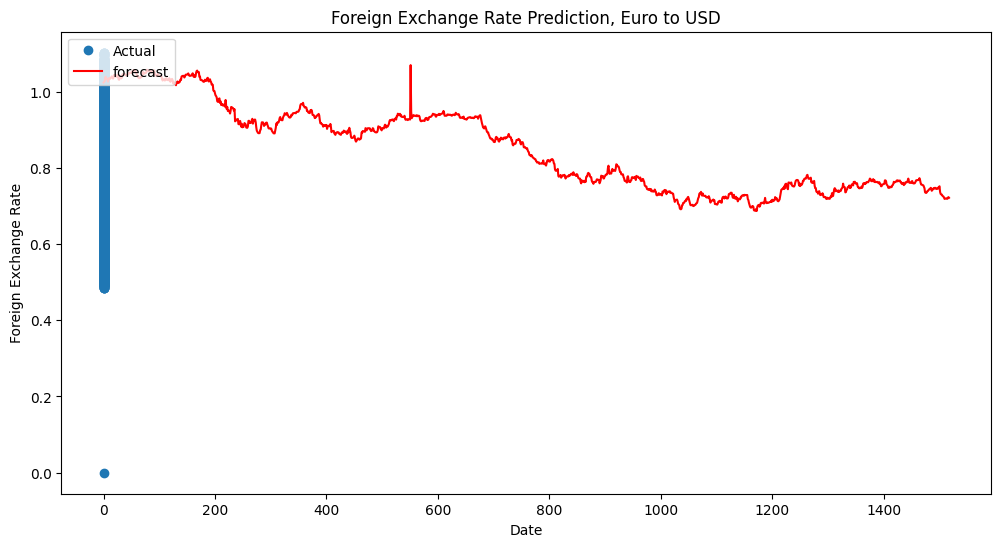

In [77]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction, Euro to USD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df_week['Ex_rate'], Final_data['Predicted Exchange Rate'], 'o', label='Actual')
ax.plot(predictions_df, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')